# Recommendation Systems for Online Learning (Udemy Data)

# By Thabo Pilusa 

In [1]:
#Start with the usual, importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity


Load the data downloaded from: https://www.kaggle.com/datasets/shailx/course-recommendation-system-dataset?resource=download

In [2]:
file_path = 'udemy_course_data.csv' 
df = pd.read_csv(file_path)


Data Cleaning: Handling missing values

In [3]:
df.dropna(inplace=True)

Exploratory Data Analysis

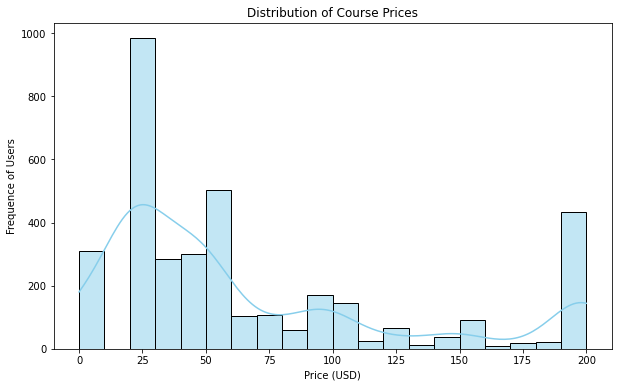

In [60]:
# Distribution of Course Prices
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Course Prices')
plt.xlabel('Price (USD)')
plt.ylabel('Frequence of Users')
plt.show()


Prepare the data for recommendation system



In [48]:
# Selecting relevant features for similarity computation
features = ['num_subscribers', 'num_reviews', 'num_lectures'] #'content_duration']
course_features = df[features]



Normalize the feature data

In [49]:
course_features_normalized = (course_features - course_features.min()) / (course_features.max() - course_features.min())


Similarity between courses


In [61]:
course_similarity = cosine_similarity(course_features_normalized)
course_similarity_df = pd.DataFrame(course_similarity, index=df['course_id'], columns=df['course_id'])


Function to get recommended courses

In [64]:

def get_course_recommendations(course_id, n=5):
    if course_id not in course_similarity_df.index:
        return []
    
    similar_courses = course_similarity_df[course_id].sort_values(ascending=False).index[1:n+1]
    recommended_courses = df[df['course_id'].isin(similar_courses)][['course_id', 'course_title', 'url']]
    return recommended_courses


Get recommended courses example

In [65]:
# Randomly select a course ID and get its name
course_sample_id = df['course_id'].sample(1).values[0]
course_sample_name = df.loc[df['course_id'] == course_sample_id, 'course_title'].values[0] 
# Generate recommendations
recommended_courses = get_course_recommendations(course_sample_id)

# Print results with the course name
print(f"Recommended courses for: '{course_sample_name}' (ID: {course_sample_id}):;")
print(recommended_courses)

Recommended courses for: 'Amazon Alexa Development: From Beginner to Intermediate' (ID: 997916):;
      course_id                                       course_title  \
90       891484      Forex Trading - Advanced Fundamental Analysis   
1055    1137310                                  自分に合った投資信託を見つけよう！   
1233      16714                   Color Basics for Print Designers   
3486    1031620  Learn Laravel with Database Migration & Seedin...   
3596     800148  Become a Rockstar Web Developer - Learn By Coding   

                                                    url  
90    https://www.udemy.com/forex-trading-advanced-f...  
1055             https://www.udemy.com/kabucom_toushin/  
1233  https://www.udemy.com/color-basics-for-print-d...  
3486  https://www.udemy.com/laravel-53-migra-migrati...  
3596  https://www.udemy.com/become-rockstar-php-deve...  
